## 15.2 가장 인기있는 머신러닝과 딥러닝 플랫폼 : 텐서플로우

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

print(tf.__version__)

2.8.0


## 15.3 구글 코래버러토리를Colaboratory를 이용한 텐서플로우 사용

In [3]:
# tensorflow와 tf.keras를 임포트한다
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
 
# 패션 MNIST 데이터는 keras의 데이터셋에 있는데 이를 읽어와서 학습용, 테스트 데이터로 구분
fashion_mnist = keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(train_images.shape)  # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


## 15.5 패션 MNIST는 레이블이 있는 이미지 데이터이다

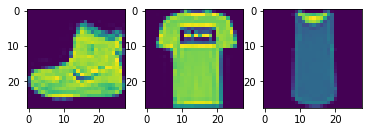

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(train_images[0])       # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1])       # 두 번째 훈련용 데이터
ax3.imshow(train_images[2])       # 세 번째 훈련용 데이터
plt.show()

In [6]:
print(train_labels[:3])

[9 0 0]


## 15.6 딥러닝? 인공 신경망을 구축해 보자

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

## 15.7 인공 신경망을 학습시켜 보자 : 최적화와 에폭

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.9218 - accuracy: 0.6828
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7127 - accuracy: 0.7242
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6353 - accuracy: 0.7470
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5764 - accuracy: 0.7936
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5440 - accuracy: 0.8123


In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.5907 - accuracy: 0.7885 - 536ms/epoch - 2ms/step

테스트 정확도: 0.7885000109672546


## 15.8 학습된 신경망을 새 이미지에 적용해 보자

In [11]:
test_images.shape

(10000, 28, 28)

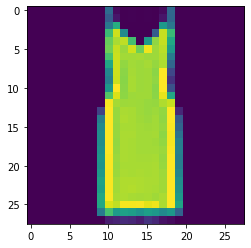

In [12]:
import numpy as np
randIdx = np.random.randint(0, 1000)
plt.imshow(test_images[randIdx])

In [13]:
yhat = model.predict( test_images[randIdx][np.newaxis, :, :])
yhat

array([[6.3061146e-03, 4.0521673e-03, 2.5764462e-05, 9.8613852e-01,
        1.8511799e-03, 1.2283935e-11, 1.3911854e-03, 1.7016291e-21,
        2.3499684e-04, 3.3500117e-17]], dtype=float32)

## 15.9 클래스를 찾아 출력하게 만들기

In [14]:
yhat = np.argmax( model.predict( test_images[randIdx][np.newaxis, :, :]) )
yhat

3

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
yhat = np.argmax( model.predict( test_images[randIdx][np.newaxis, :, :]) )
print(class_names[yhat])

Dress


## 15.10 나만의 데이터 이용법 : 드라이브에 올린 파일 접근하기


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!pwd

/content


### 15.11 클라우드에 자료를 코랩에서 사용하기


In [19]:
!ls ./drive/'My Drive' -la

total 12068
drwx------ 2 root root    4096 Feb  5  2020  자료
drwx------ 2 root root    4096 Sep 21  2020  연구
drwx------ 2 root root    4096 Nov 19  2020  강의
drwx------ 2 root root    4096 Nov  9 08:39 '임시 저장'
-rw------- 1 root root   73930 Sep 10  2020  bag_cartoon.png
-rw------- 1 root root  309419 Oct 26 09:24 'chap6 (1).pdf'
-rw------- 1 root root  309419 Oct 26 09:25  chap6.pdf
drwx------ 2 root root    4096 Aug  9  2021 'Colab my test'
drwx------ 2 root root    4096 Jun  4  2021 'Colab Notebooks'
-rw------- 1 root root 9665466 Oct 26 09:25  jeff.pdf
-rw------- 1 root root  598385 Sep  9  2020  myData.png
-rw------- 1 root root 1374504 Mar 24 10:09  myFirstModel.h5


## 15.12 드라이브의 이미지 파일을 읽어 화면에 표시해 보기

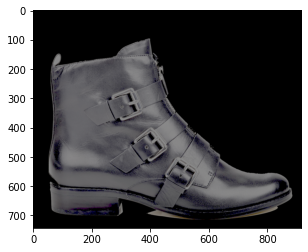

In [20]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('./drive/My Drive/myData.png')
plt.imshow(img)

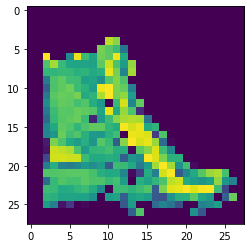

In [21]:
import cv2
img = cv2.imread('./drive/My Drive/myData.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28) )
plt.imshow(img)

### 15.13 이미지를 모델에 입력으로 제공해 인식을 시도하자

In [22]:
input_data = img[np.newaxis, :, :]
input_data.shape

(1, 28, 28)

In [23]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
yhat = np.argmax( model.predict( input_data ) )

print(class_names[yhat])

Bag


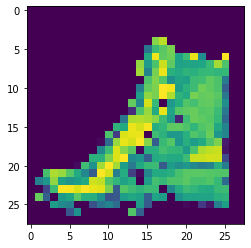

In [24]:
input_mirror = input_data[:, :, ::-1]
plt.imshow(input_mirror[0])

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
yhat = np.argmax( model.predict( input_mirror ) )

print(class_names[yhat])

Ankle boot


## 15.14 신경망 학습과 편향 : 학습의 한계를 인식하자

In [26]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6357 - accuracy: 0.5627
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8956 - accuracy: 0.6446
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6894 - accuracy: 0.7281
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5930 - accuracy: 0.7697
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5280 - accuracy: 0.8038


## 15.16 학습된 모델 저장하고 불러와서 사용하기

In [27]:
model2.save('./drive/My Drive/myFirstModel.h5')
!ls ./drive/'My Drive' -la

total 12068
drwx------ 2 root root    4096 Feb  5  2020  자료
drwx------ 2 root root    4096 Sep 21  2020  연구
drwx------ 2 root root    4096 Nov 19  2020  강의
drwx------ 2 root root    4096 Nov  9 08:39 '임시 저장'
-rw------- 1 root root   73930 Sep 10  2020  bag_cartoon.png
-rw------- 1 root root  309419 Oct 26 09:24 'chap6 (1).pdf'
-rw------- 1 root root  309419 Oct 26 09:25  chap6.pdf
drwx------ 2 root root    4096 Aug  9  2021 'Colab my test'
drwx------ 2 root root    4096 Jun  4  2021 'Colab Notebooks'
-rw------- 1 root root 9665466 Oct 26 09:25  jeff.pdf
-rw------- 1 root root  598385 Sep  9  2020  myData.png
-rw------- 1 root root 1374504 Mar 24 10:16  myFirstModel.h5


In [28]:
model_imported = keras.models.load_model('./drive/My Drive/myFirstModel.h5')
model_imported.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [29]:
!ls -al ./drive/'My Drive'

total 12068
drwx------ 2 root root    4096 Feb  5  2020  자료
drwx------ 2 root root    4096 Sep 21  2020  연구
drwx------ 2 root root    4096 Nov 19  2020  강의
drwx------ 2 root root    4096 Nov  9 08:39 '임시 저장'
-rw------- 1 root root   73930 Sep 10  2020  bag_cartoon.png
-rw------- 1 root root  309419 Oct 26 09:24 'chap6 (1).pdf'
-rw------- 1 root root  309419 Oct 26 09:25  chap6.pdf
drwx------ 2 root root    4096 Aug  9  2021 'Colab my test'
drwx------ 2 root root    4096 Jun  4  2021 'Colab Notebooks'
-rw------- 1 root root 9665466 Oct 26 09:25  jeff.pdf
-rw------- 1 root root  598385 Sep  9  2020  myData.png
-rw------- 1 root root 1374504 Mar 24 10:16  myFirstModel.h5


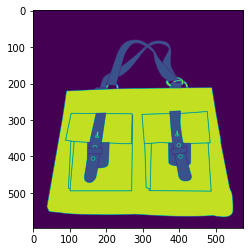

In [30]:
import cv2
img = cv2.imread('./drive/My Drive/bag_cartoon.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

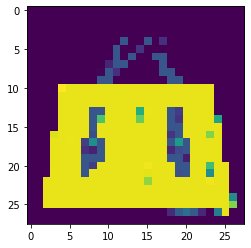

In [31]:
img = cv2.resize(img, (28, 28) )
plt.imshow(img)

In [32]:
input_data = img[np.newaxis, :, :]
yhat = np.argmax( model_imported.predict( input_data ) )
print(class_names[yhat])


Bag
